<a href="https://colab.research.google.com/github/glorivaas/Machine_Learning25/blob/main/LAB3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 3 - Linear and Logistic Regression
### Author: Gloria Rivas



---
## **TESTING DIFFERENT THESHOLDS**
**Is a 0.5 threshold always the best choice in Logistic Regression?**
<br>We will use the same dataset used in class.

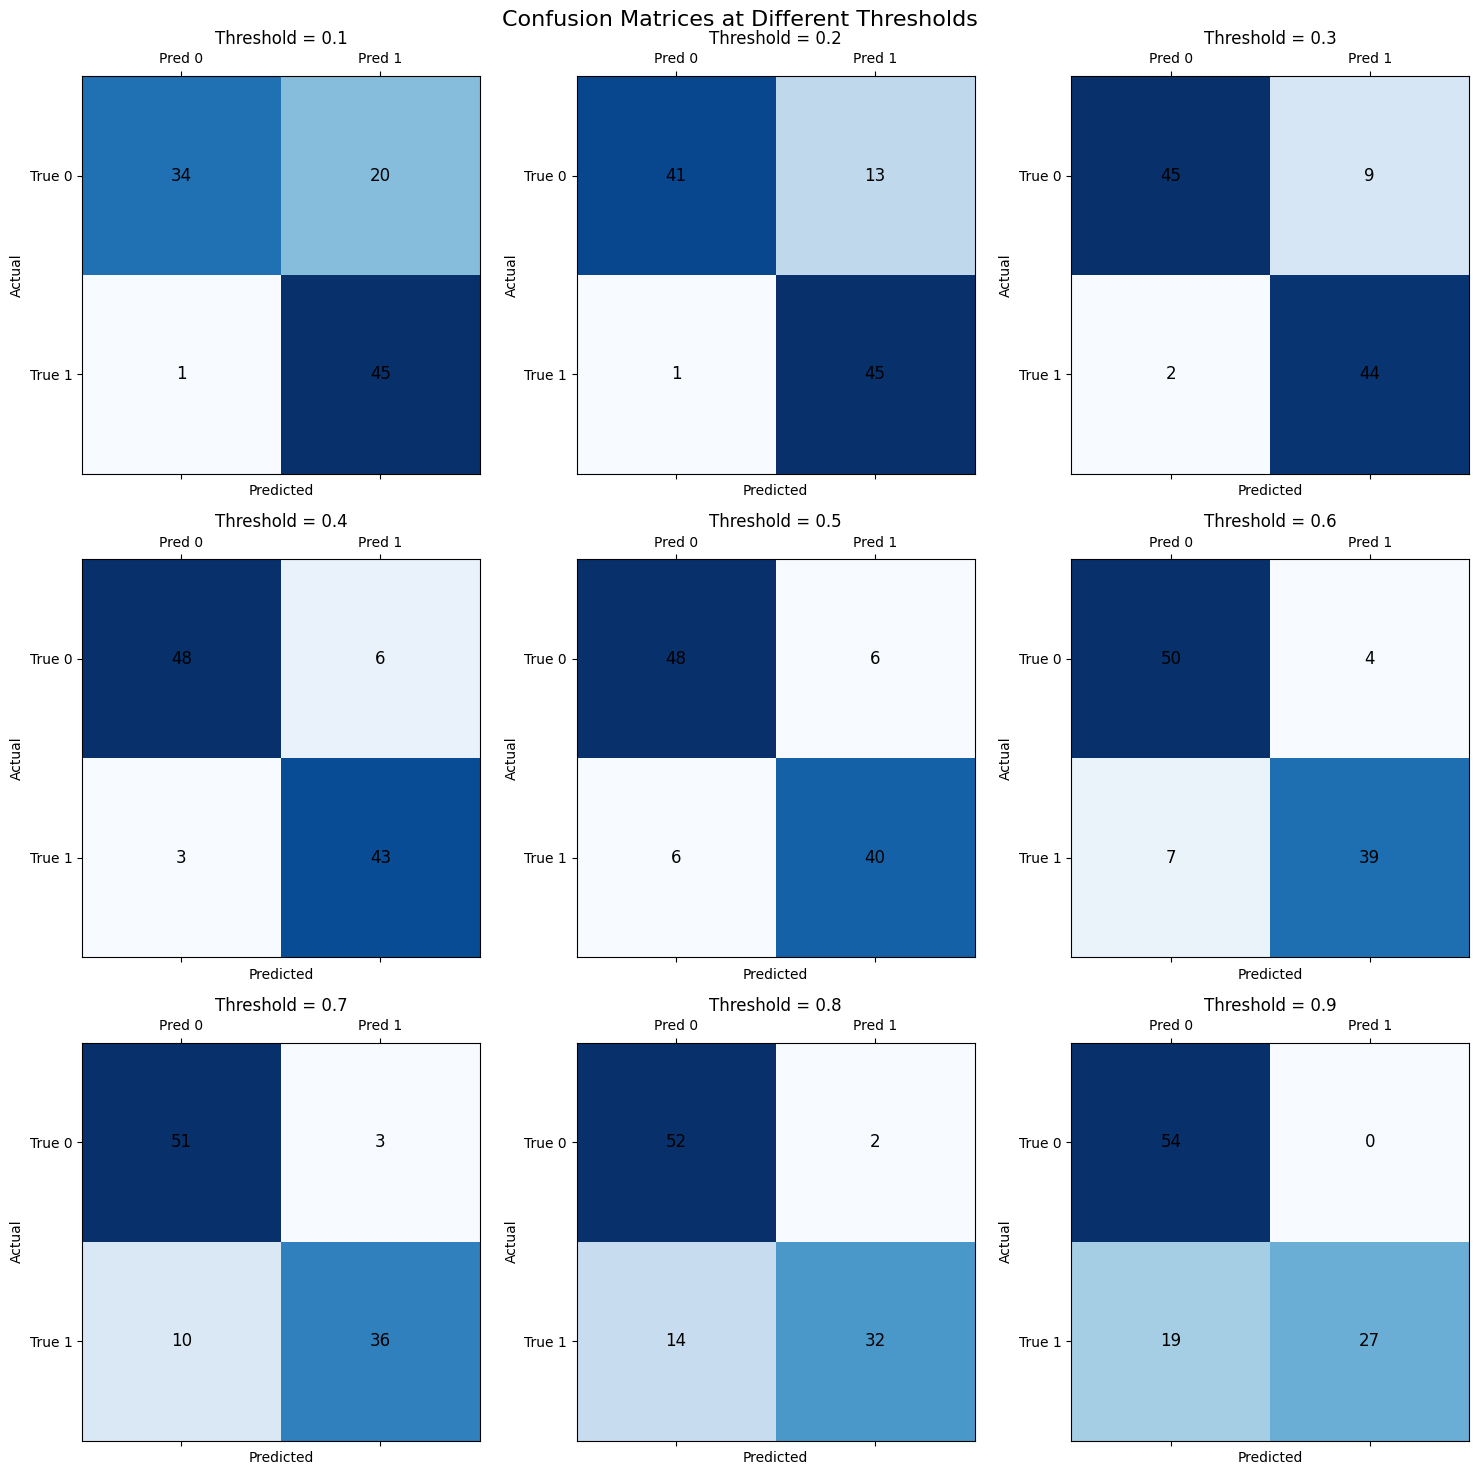

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix

np.random.seed(42)
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y_true = np.random.binomial(1, 1 / (1 + np.exp(-(-1 + 2 * X.flatten()))))

logistic_model = LogisticRegression()
logistic_model.fit(X, y_true)
y_pred_prob = logistic_model.predict_proba(X)[:, 1]

thresholds = np.linspace(0.1, 0.9, 9)
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.ravel()

for i, thresh in enumerate(thresholds):
    y_pred = (y_pred_prob >= thresh).astype(int)
    cm = confusion_matrix(y_true, y_pred)

    ax = axes[i]
    im = ax.matshow(cm, cmap='Blues')
    ax.set_title(f"Threshold = {thresh:.1f}")
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xticklabels(["Pred 0", "Pred 1"])
    ax.set_yticklabels(["True 0", "True 1"])
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

    for j in range(2):
        for k in range(2):
            ax.text(k, j, cm[j, k], ha='center', va='center', color='black', fontsize=12)

plt.suptitle("Confusion Matrices at Different Thresholds", fontsize=16)
plt.tight_layout()
plt.show()



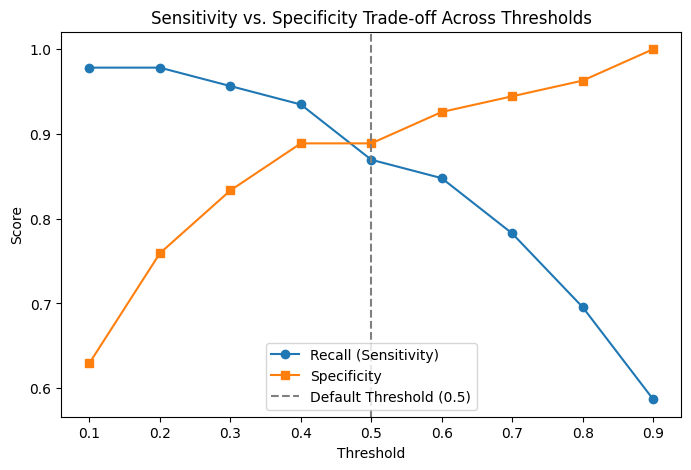

In [21]:
specificity_vals = []
threshold_results = []

for thresh in thresholds:
    y_pred = (y_pred_prob >= thresh).astype(int)
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='binary')

    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)

    specificity_vals.append(specificity)
    threshold_results.append([thresh, precision, recall, specificity, f1])

threshold_df = pd.DataFrame(threshold_results, columns=["Threshold", "Precision", "Recall (Sensitivity)", "Specificity", "F1-Score"])

plt.figure(figsize=(8, 5))
plt.plot(thresholds, [row[2] for row in threshold_results], label="Recall (Sensitivity)", marker='o', linestyle='-')
plt.plot(thresholds, specificity_vals, label="Specificity", marker='s', linestyle='-')
plt.axvline(0.5, color='gray', linestyle='--', label="Default Threshold (0.5)")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Sensitivity vs. Specificity Trade-off Across Thresholds")
plt.legend()
plt.show()


#Observations
1.  **Lower Thresholds (0.1 - 0.3)**
<br>The model classifies more observations as positive, resulting in fewer false negatives. However, this increases false positives, meaning more negatives are misclassified as positives.
<br>This is suitable for scenarios where missing a positive case is costly, such as disease detection or fraud detection.

2. **Middle Thresholds (0.4 - 0.6)**
<br>The model maintains a balance between false positives and false negatives. For instance, at threshold = 0.5 we have 6 false positives and 6 false negatives, so precision and recall are similar.
This is the default setting and works well when precision and recall are equally important.
<br>This is a good situation for general cases like spam filtering.

3. **Higher Thresholds (0.7 - 0.9)**
<br>The model is more selective in predicting positives, reducing false positives.
Nevertheless, false negatives increase, meaning more actual positives are misclassified as negatives. For example, at threshold = 0.9, there are only 0 false positives, but 19 false negatives.
This means specificity is high, but recall is low.
<br>This is optimal in situations where false positives are costly, such as criminal justice decisions or autonomous vehicle safety.

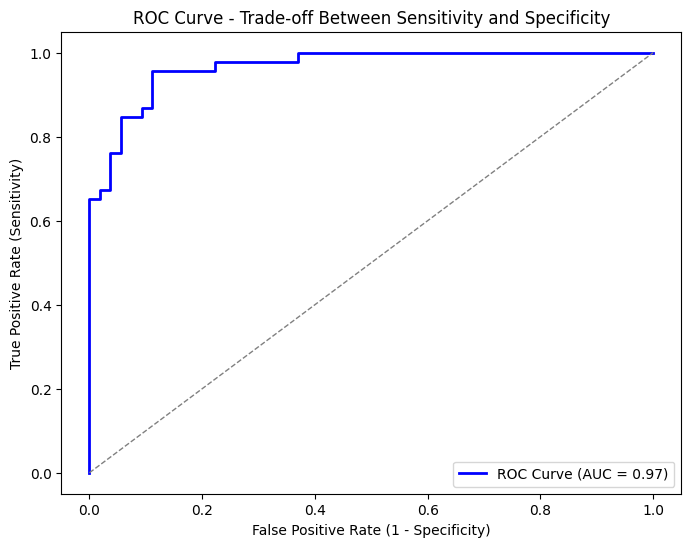

Optimal Threshold based on Youden's J Statistic: 0.40


In [24]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, roc_thresholds = roc_curve(y_true, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.title("ROC Curve - Trade-off Between Sensitivity and Specificity")
plt.legend()
plt.show()

j_scores = tpr - fpr
best_index = np.argmax(j_scores)
best_threshold = roc_thresholds[best_index]

print(f"Optimal Threshold based on Youden's J Statistic: {best_threshold:.2f}")

- **How does a ROC curve help in this process?**
<br>The Receiver Operating Characteristic (ROC) curve helps visualize the trade-off between Sensitivity (True Positive Rate) and 1 - Specificity (False Positive Rate) at different classification thresholds.
<br>The X-axis represents (1 - Specificity) and the Y-axis represents Sensitivity. The blue line represents model performance at various thresholds.

- **How to use a ROC curve for threshold selection?**
<br>Look for the "elbow point" in the ROC curve, where Sensitivity is high and False Positives are low.
Compute Youden’s J statistic:
$$J= Sensitivity + Specificity−1$$
The optimal threshold is where
J is maximized. In our case, the best threshold is approximately 0.40.

- **What is the AUC metric and how is it useful?**
<br>AUC (Area Under the Curve) is a metric that quantifies the overall performance of a binary classifier. It is derived from the ROC curve.
AUC represents the probability that the classifier ranks a randomly chosen positive instance higher than a randomly chosen negative instance. For interpreting this metrics, we can say that a AUC > 0.9 →means an excellent model (highly effective classification), while a AUC < 0.5 is worse than random (the model is misclassifying). Some benefits of the AUC is that it is robust, threshold independent, and ideal for imbalanced data problems.
<br> In our case, the computed AUC = 0.97, meaning the model has excellent discrimination ability between positive and negative classes.